In [4]:

import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.rand(100,1)-0.5
y = 3*x[:, 0] ** 2 + 0.05*np.random.randn(100)

In [3]:
y

array([-0.09523274,  0.11869042,  0.36303265,  0.4093053 ,  0.06770978,
        0.55512811,  0.45270715,  0.14386795, -0.02406493,  0.61049852,
        0.05946799,  0.28969393,  0.5466744 ,  0.54925642,  0.18271183,
        0.04354355,  0.02077958,  0.21500767,  0.23237307,  0.72472925,
        0.36218299,  0.35521693,  0.3457304 ,  0.19168246,  0.28281537,
        0.32802353,  0.40786252,  0.02364831,  0.39932886,  0.05192262,
        0.54934122,  0.1959121 ,  0.68176139, -0.01313682,  0.04737188,
        0.69740179,  0.45897385,  0.19467383,  0.13849018,  0.36307756,
        0.52584351,  0.6817786 ,  0.156412  ,  0.02902829,  0.54895016,
        0.13343385,  0.29118751,  0.44819536,  0.60026266,  0.6384516 ,
       -0.09351229,  0.38938187,  0.27833332,  0.01908582,  0.06519615,
       -0.04420479,  0.32513095,  0.14427404,  0.17137158,  0.22137618,
        0.67330078,  0.11763637,  0.01494688,  0.72952883,  0.56708965,
        0.05553838,  0.51147888,  0.67228961,  0.7504472 ,  0.02

In [4]:
import pandas as pd
df = pd.DataFrame()
df["x"] = x.reshape(100)
df["y"] = y

In [5]:
df

,x,y
0,-0.040280,-0.095233
1,-0.167775,0.118690
2,0.386778,0.363033
3,0.371850,0.409305
4,-0.028321,0.067710
...,...,...
95,0.132049,0.122422
96,0.058821,0.034365
97,0.418920,0.551059
98,-0.086828,0.009251


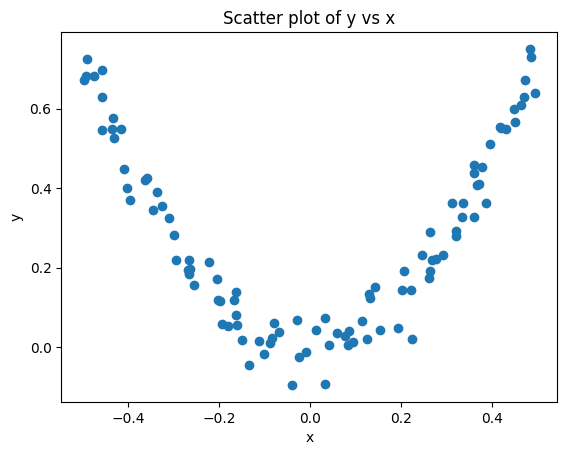

In [6]:
plt.scatter(df["x"], df["y"])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of y vs x")
plt.show() 

In [7]:
df.head()

,x,y
0,-0.040280,-0.095233
1,-0.167775,0.118690
2,0.386778,0.363033
3,0.371850,0.409305
4,-0.028321,0.067710


In [8]:
df["pred1"]  = df["y"].mean()

In [9]:
df.head()

,x,y,pred1
0,-0.040280,-0.095233,0.275698
1,-0.167775,0.118690,0.275698
2,0.386778,0.363033,0.275698
3,0.371850,0.409305,0.275698
4,-0.028321,0.067710,0.275698


In [10]:
df["res1"] = df["y"] - df["pred1"]

In [11]:
df.head()

,x,y,pred1,res1
0,-0.040280,-0.095233,0.275698,-0.370931
1,-0.167775,0.118690,0.275698,-0.157008
2,0.386778,0.363033,0.275698,0.087335
3,0.371850,0.409305,0.275698,0.133607
4,-0.028321,0.067710,0.275698,-0.207988


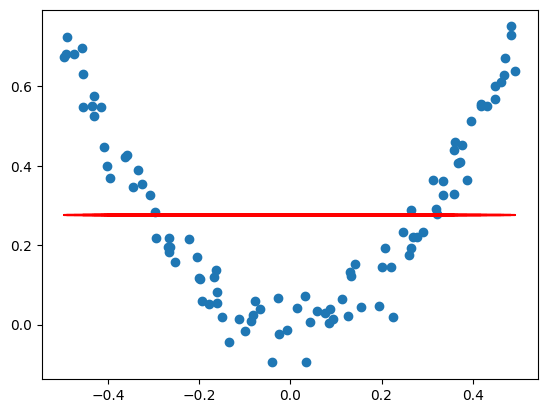

In [12]:
plt.scatter(df["x"], df["y"])
plt.plot(df["x"], df["pred1"], color="red")

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [15]:
tree1.fit(df["x"].values.reshape(100, 1), df["res1"].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [16]:
from sklearn.tree import plot_tree

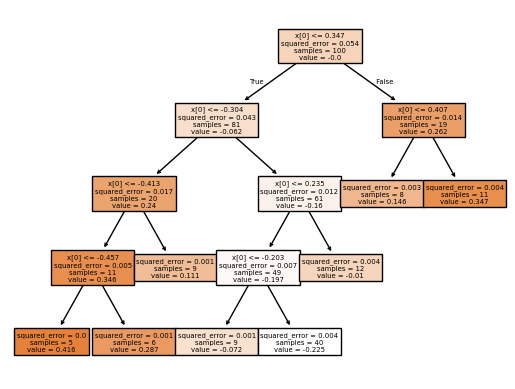

In [ ]:
# tree on top of the data 
plot_tree(tree1,filled=True)
plt.show()

In [19]:
x_test = np.linspace(-0.5, 0.5, 500)

In [20]:
x_test

array([-0.5       , -0.49799599, -0.49599198, -0.49398798, -0.49198397,
       -0.48997996, -0.48797595, -0.48597194, -0.48396794, -0.48196393,
       -0.47995992, -0.47795591, -0.4759519 , -0.4739479 , -0.47194389,
       -0.46993988, -0.46793587, -0.46593186, -0.46392786, -0.46192385,
       -0.45991984, -0.45791583, -0.45591182, -0.45390782, -0.45190381,
       -0.4498998 , -0.44789579, -0.44589178, -0.44388778, -0.44188377,
       -0.43987976, -0.43787575, -0.43587174, -0.43386774, -0.43186373,
       -0.42985972, -0.42785571, -0.4258517 , -0.4238477 , -0.42184369,
       -0.41983968, -0.41783567, -0.41583166, -0.41382766, -0.41182365,
       -0.40981964, -0.40781563, -0.40581162, -0.40380762, -0.40180361,
       -0.3997996 , -0.39779559, -0.39579158, -0.39378758, -0.39178357,
       -0.38977956, -0.38777555, -0.38577154, -0.38376754, -0.38176353,
       -0.37975952, -0.37775551, -0.3757515 , -0.37374749, -0.37174349,
       -0.36973948, -0.36773547, -0.36573146, -0.36372745, -0.36

In [22]:
y_predict = tree1.predict(x_test.reshape(500, 1))

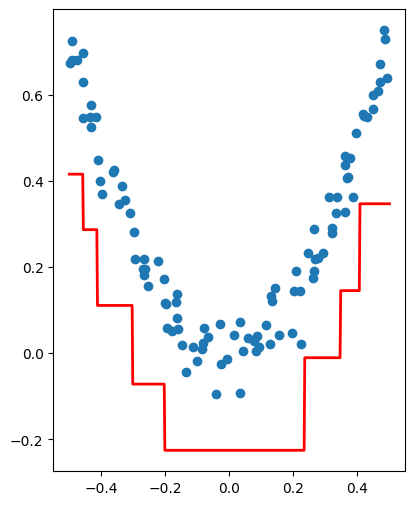

In [24]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.plot(x_test, y_predict, linewidth=2 ,color="red")
plt.scatter(df["x"], df["y"])